### Model selection for linear regression
#### 
    Method:-
    1. Split the data into 3 sets (trian, cross validation, and test)
    2. Use Train data set to train the model, and then use cross validation set to select the model.
    3. Test the selected model using test data set.
#### 

In [2]:
# import the required libraries
import numpy as np

# for linear regresssion using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# for neural network
import tensorflow as tf

# for visualization
import matplotlib.pyplot as plt


c:\Users\HtetMyat\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
# load the data and prepare them
data = np.loadtxt(r'C:\Users\HtetMyat\DeepLearning\week3\model_selection\data1.csv', delimiter=',')

# splits the data into inputs and outputs arrays
x = data[:, 0]
y = data[:, 1]

# convert 1-D arrays into 2-D arrays for upcoming commands
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

# observe the data
print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


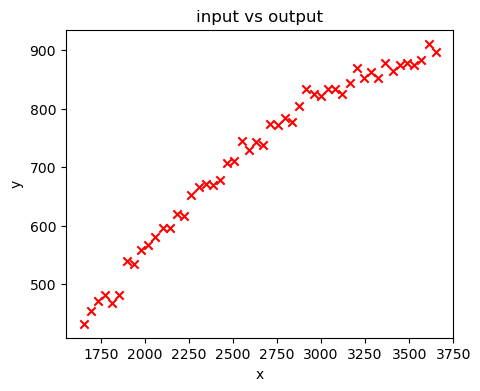

In [10]:
# create the figure
plt.figure(figsize=(5, 4))

# scatter the data points
plt.scatter(x, y, marker='x', c='r')
plt.title('input vs output')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [8]:
# get 60% of data for training and 40% for temporary to split as cross validatin and test
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.4, random_state=1)

# split the 40% of the data again
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

# delete the temporary variables
del x_, y_

print(f"the shape of the training set (inputs): {x_train.shape}")
print(f"the shape of the training set (targets): {y_train.shape}")
print(f"the shape of the cross validation set (inputs): {x_cv.shape}")
print(f"the shape of the cross validation set (targets): {y_cv.shape}")
print(f"the shape of the test set (inputs): {x_test.shape}")
print(f"the shape of the test set (targets): {y_test.shape}")

the shape of the training set (inputs): (30, 1)
the shape of the training set (targets): (30, 1)
the shape of the cross validation set (inputs): (10, 1)
the shape of the cross validation set (targets): (10, 1)
the shape of the test set (inputs): (10, 1)
the shape of the test set (targets): (10, 1)


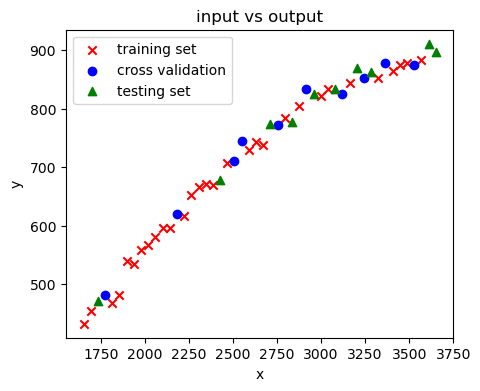

In [11]:
# plot the splitted data sets
plt.figure(figsize=(5, 4))

plt.scatter(x_train, y_train, marker='x', c='r', label='training set')
plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation')
plt.scatter(x_test, y_test, marker='^', c='g', label='testing set')
plt.title('input vs output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


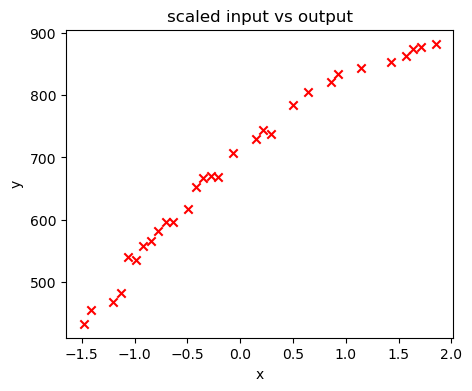

In [16]:
# Feature scaling
scaler_linear = StandardScaler()

x_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# create the figure
plt.figure(figsize=(5, 4))

# scatter the data points
plt.scatter(x_train_scaled, y_train, marker='x', c='r')
plt.title('scaled input vs output')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [17]:
# Train the model
linear_model = LinearRegression()

linear_model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Evaluate the model
yhat = linear_model.predict(x_train_scaled)

print(f"traing MSE: {mean_squared_error(y_train, yhat) / 2}")

traing MSE: 406.19374192533127


In [22]:
# Scale the CV data set
x_cv_scaled = scaler_linear.transform(x_cv)

print(f"mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
print(f"standard deviation to scale the CV set: {scaler_linear.scale_.squeeze()}")

yhat = linear_model.predict(x_cv_scaled)

print(f"MSE for cross validation: {mean_squared_error(y_cv, yhat)/2}")

mean used to scale the CV set: 2504.061224489796
standard deviation to scale the CV set: 574.8536806268388
MSE for cross validation: 551.7789026952216


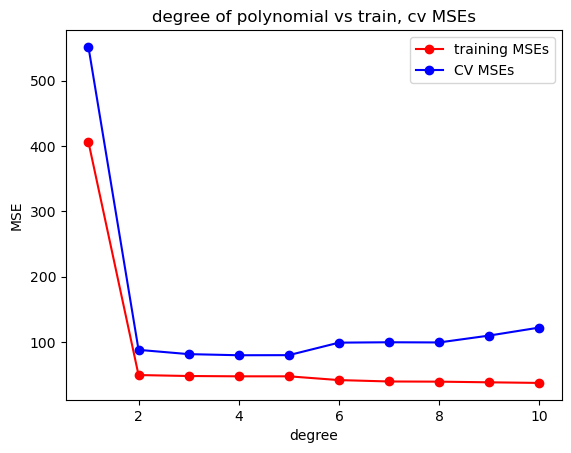

In [30]:
# to select the best model that fit the data
# initialize lists to store errors, models, and feature transforms
train_mses = []
cv_mses = []
polys = []
models = []
scalers = []

for degree in range(1 , 11):

    # add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    # scaled the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)

    # create and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    models.append(model)

    # compute the training MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # add the polynomial features and scale the CV data set
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

    # compute the CV MSE
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

degrees = range(1, 11)
plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs')
plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs')
plt.title('degree of polynomial vs train, cv MSEs')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [31]:
# choosing the best model
degree = np.argmin(cv_mses) + 1
print(f"lowest mse is found in the model with degree: {degree}")

lowest mse is found in the model with degree: 4


In [34]:
# test the model with training data set
## add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# scale the test set
X_test_mapped_scaled = scalers[degree - 1].transform(X_test_mapped)

# compute the mse
yhat = models[degree - 1].predict(X_test_mapped_scaled)
mse = mean_squared_error(y_test, yhat)

print(f"Training MSE: {train_mses[degree-1]}")
print(f"CV MSE: {cv_mses[degree-1]}")
print(f"Testing MSE: {mse}")

Training MSE: 47.14646644263576
CV MSE: 79.43134912070484
Testing MSE: 75.66794091868917
